# Spatial correlation analysis with Pysal

## Readying and tidying data

In [33]:
# this cell contains our library imports
import pandas as pd
import altair as alt
import geopandas as geopandas
import contextily as cx
import folium as folium
from pysal.viz import mapclassify
from libpysal import weights
from splot.libpysal import plot_spatial_weights
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
import esda as esda
import rasterio as rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [4]:
uhi = rasterio.open('tas_Brussels_UrbClim_2017_08_v1.0_week.tif')

In [7]:
uhi.indexes

(1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168)

In [8]:
hour1 = uhi.read(1)

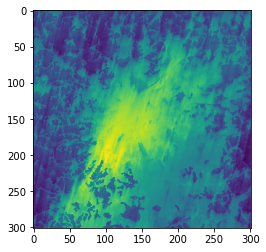

<AxesSubplot:>

In [9]:
rasterio.plot.show(hour1)

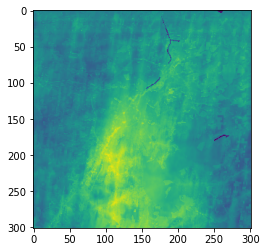

<AxesSubplot:>

In [10]:
hour12 = uhi.read(12)
rasterio.plot.show(hour12)

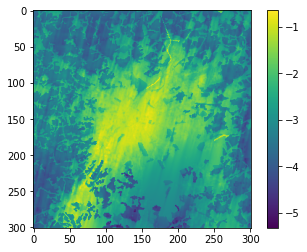

In [13]:
plt.imshow(hour1 - hour12)
plt.colorbar()

In [22]:
mask = rasterio.open('ruralurbanmask_Brussels_UrbClim_v1.0.tif')
mask = mask.read(1)

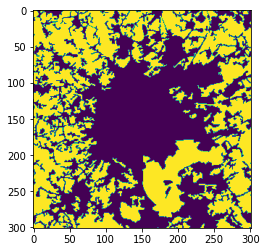

In [64]:
plt.imshow(mask)

In [43]:
mask = np.where(mask > 1, 0, mask)

In [53]:
temp_rural = mask * hour12

In [54]:
temp_rural[temp_rural > 0].mean()

295.0676

In [50]:
(mask - 1) * -1

array([[ 1., -0., -0., ..., -0.,  1.,  1.],
       [-0., -0., -0., ...,  1.,  1.,  1.],
       [-0., -0., -0., ...,  1.,  1.,  1.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0.,  1.,  1.]], dtype=float32)

In [55]:
temp_urban = ((mask - 1) * -1) * hour12

In [56]:
temp_urban[temp_urban > 0].mean()

295.3849

In [58]:
array_list = []
for i in range(24):
    array_list.append(uhi.read(i + 1))

In [61]:
np.max(array_list, axis=0)

array([[293.85715, 295.0583 , 295.10196, ..., 295.7362 , 295.94073,
        295.85736],
       [295.0339 , 295.06284, 295.07877, ..., 295.9805 , 296.06592,
        295.90903],
       [295.0352 , 295.0237 , 295.0534 , ..., 296.07205, 296.13193,
        296.01385],
       ...,
       [295.4667 , 295.492  , 295.49585, ..., 294.4761 , 294.50436,
        294.61102],
       [295.58356, 295.644  , 295.67548, ..., 294.49673, 294.56183,
        294.7442 ],
       [295.51025, 295.54968, 295.55862, ..., 294.686  , 294.7643 ,
        294.8557 ]], dtype=float32)

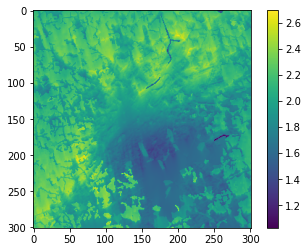

In [67]:
plt.imshow(np.std(array_list, axis=0))
plt.colorbar()